# 남이 만든 CNN 모델! (Pretrained CNN)
---
## 쉽지만 중요한 코너!
## 이미 **'잘 만들어진'** 모델들을 가져다가 사용해보자.

- [이 링크를 참고해보자](https://keras.io/api/applications/)

## Keras Update

In [1]:
!pip install keras-nightly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.6 MB/s eta 0:00:00


## Library Loading

In [2]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

import numpy as np
import matplotlib.pyplot as plt

## Load **Pretrained** Model

- **"잘 만들어진"** 모델 바로 가져오기!

In [3]:
vgg_model = VGG16(include_top=True,       # VGG16 모델의 아웃풋 레이어까지 전부 불러오기
                  weights='imagenet',     # ImageNet 데이터를 기반으로 학습된 가중치 불러오기
                  input_shape=(224,224,3) # 모델에 들어가는 데이터의 형태
                  )

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
vgg_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
from keras.utils import plot_model

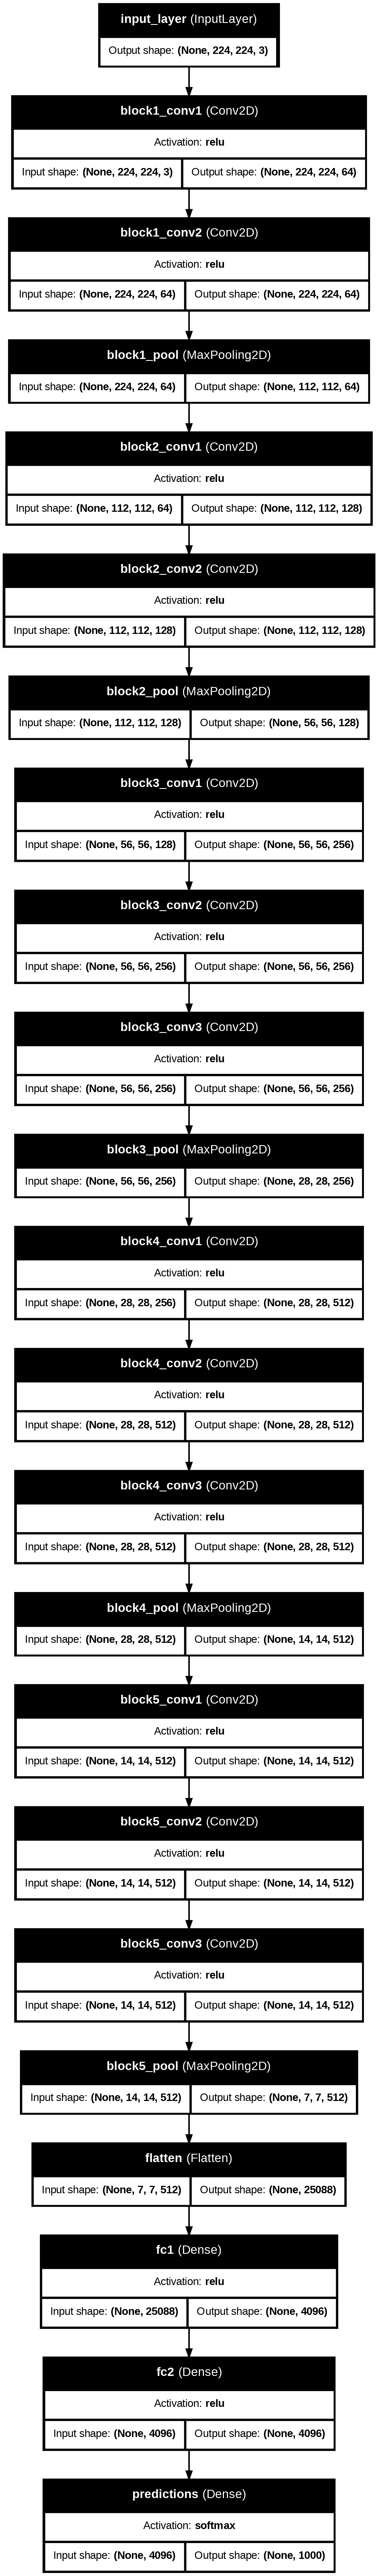

In [6]:
plot_model(vgg_model, show_shapes=True, show_layer_names=True, show_layer_activations=True)

* 아웃풋 레이어를 보면 노드가 1000개!

* 분류 가능한 이미지가 1000개라는 뜻!

* [**구경하러 가자**](http://image-net.org/challenges/LSVRC/2014/browse-synsets)

# 이미지 파일을 업로드 해둔 곳으로 가자!
---
### **구글 드라이브에 수집한 이미지를 업로드!**
### **순서**
1. 구글링하여 이미지를 수집합니다.
2. **본인의** 구글 드라이브에 my_data 폴더를 생성합니다.
3. my_data 폴더 안에 img1 폴더를 생성합니다.
4. 1번 단계에서 수집한 이미지를 img1 폴더에 업로드 합니다.
5. 30초 정도 기다립시다.
6. 아래의 코드들을 실행합니다.

## Connect Colaboratory with my Google Drive
- Colaboratory와 본인의 구글 드라이브를 연결하는 과정
- 아래 코드를 실행하여 폴더가 올바르게 생성 되었는지 확인

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!ls

drive  model.png  sample_data


In [9]:
!cd /content/drive/MyDrive/my_data; ls

datasets  img1	model1.keras  my_first_save.h5	   my_mnist   MyPjt  transfer
handmade  img2	model.png     my_first_save.keras  my_mnist2  temp


## Load Image
- 업로드 한 이미지 하나를 불러와 확인해본다

In [10]:
import glob
from keras.preprocessing import image

In [11]:
files = glob.glob('/content/drive/MyDrive/my_data/img1/*')
files

['/content/drive/MyDrive/my_data/img1/puppy-1903313_960_720.jpg',
 '/content/drive/MyDrive/my_data/img1/puppy-2785074_960_720.jpg',
 '/content/drive/MyDrive/my_data/img1/dog-4390885_960_720.jpg',
 '/content/drive/MyDrive/my_data/img1/dog-2561134_960_720.jpg',
 '/content/drive/MyDrive/my_data/img1/dog-1728494_960_720.webp',
 '/content/drive/MyDrive/my_data/img1/cat-2083492_960_720.jpg',
 '/content/drive/MyDrive/my_data/img1/maine-coon-694730_960_720.jpg',
 '/content/drive/MyDrive/my_data/img1/cat-2536662_960_720.jpg',
 '/content/drive/MyDrive/my_data/img1/tiger-2535888_960_720.jpg',
 '/content/drive/MyDrive/my_data/img1/cat-1151519_960_720.jpg',
 '/content/drive/MyDrive/my_data/img1/woman-3169726_960_720.jpg',
 '/content/drive/MyDrive/my_data/img1/suit-673697_960_720.jpg',
 '/content/drive/MyDrive/my_data/img1/happy-1836445_960_720.jpg',
 '/content/drive/MyDrive/my_data/img1/art-1851483_960_720.jpg',
 '/content/drive/MyDrive/my_data/img1/notebook-581128_960_720.jpg',
 '/content/drive/My

preprocess 전: 최대값=255.0, 최소값=0.0
preprocess 후: 최대값=151.06100463867188, 최소값=-123.68000030517578
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[[('n04332243', 'strainer', 0.22408535), ('n03000134', 'chainlink_fence', 0.10095734), ('n02999410', 'chain', 0.02407687)]]


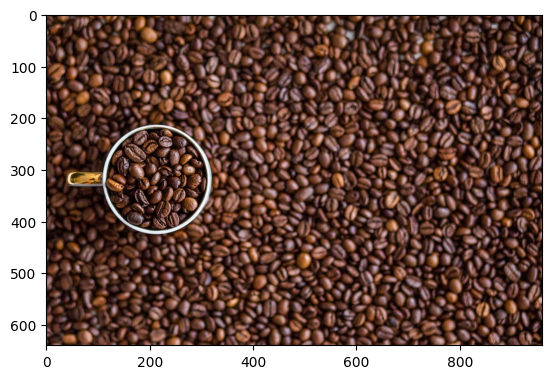

In [12]:
img = image.load_img(files[-1], color_mode='rgb', target_size = (224,224) )
img = image.img_to_array(img)
img = img.reshape((-1,224,224,3))
print(f'preprocess 전: 최대값={np.max(img)}, 최소값={np.min(img)}')

img = preprocess_input(img)
print(f'preprocess 후: 최대값={np.max(img)}, 최소값={np.min(img)}')

features = vgg_model.predict(img)
print(decode_predictions(features, top=3))

plt.imshow(image.load_img(files[-1]))
plt.show()

## Load Images
- 업로드 한 이미지 전체를 확인해본다

In [13]:
images = []

for path in files :
    img = image.load_img(path, color_mode='rgb', target_size=(224,224) )
    img = image.img_to_array(img)
    img = preprocess_input(img)
    images.append(img)

images = np.array(images)

In [14]:
features = vgg_model.predict(images)
predictions = decode_predictions(features, top=3)

for i in range(images.shape[0]) :
    print(predictions[i])
    plt.imshow(image.load_img(files[i]))
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

# **Easy, but Very Important Exercise!**

* 강아지 이미지를 수집합시다. (다른 것으로 해도 됨.)
* 본인이 판단하기에 잘 될 법한 강아지 이미지 10개를 찾아봅시다.
* 본인이 판단하기에 잘 안 될 법한 강아지 이미지 10개를 찾아봅시다.
---
- **경로 설정**
    1. my_data 폴더 안에 img2 폴더를 생성합니다.
    2. 수집한 이미지를 img2 폴더에 업로드 하세요.

In [ ]:
import glob

In [ ]:
files = glob.glob('/content/drive/MyDrive/my_data/img2/*')
files

In [ ]:
images = []

for path in files :
    img = image.load_img(path, color_mode='rgb', target_size=(224,224) )
    img = image.img_to_array(img)
    img = preprocess_input(img)
    images.append(img)

images = np.array(images)

In [ ]:
features = vgg_model.predict(images)
predictions = decode_predictions(features, top=3)

for i in range(images.shape[0]) :
    print(predictions[i])
    plt.imshow(image.load_img(files[i]))
    plt.show()